In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.svm import SVR
from scipy.stats import norm
import statsmodels.api as sm
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Train_dataset.csv',sep=',')

label_encoder = preprocessing.LabelEncoder() 
print(data.columns)
data[data.columns[0]] = label_encoder.fit_transform(data[data.columns[0]])
data[data.columns[1]] = label_encoder.fit_transform(data[data.columns[1]])
data[data.columns[2]] = label_encoder.fit_transform(data[data.columns[1]])

X = np.array(data[data.columns[1:-1]])
y = np.array(data[data.columns[-1]])

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')


In [3]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [4]:
X_train = imp.transform(X)

In [5]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.0,3.0,700.290000,12765.84,32.38,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.200000
1,3.0,3.0,214.520000,12765.84,33.25,170.560000,13753356.0,3.10,0.23,0.0164,1.0,0.942804,6.910000
2,3.0,3.0,943.420000,12765.84,88.27,143.580000,6892003.0,7.70,0.23,0.0396,1.0,0.946485,6.090000
3,0.0,0.0,828.130000,38182.08,73.66,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.600000
4,4.0,4.0,485.723837,3351.28,23.79,105.148726,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,2.0,2.0,773.910000,11270.15,40.28,61.370000,19212221.0,4.34,0.78,0.0340,74.9,0.980000,4.978322
7379,1.0,1.0,61.970000,55722.00,79.56,62.900000,8108942.0,3.48,0.23,0.0528,17.7,0.840000,5.043177
7380,1.0,1.0,131.990000,55722.00,26.16,198.770000,8382586.0,3.04,0.03,0.0359,17.7,1.220000,5.062095
7381,4.0,4.0,643.720000,3351.28,29.24,38.830000,18638400.0,2.66,0.03,0.0581,1.0,1.040000,4.981380


In [6]:
data.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [7]:
Train = pd.DataFrame(X_train, columns = data.columns[1:-1])
Train['Stock Price'] = y

In [8]:
Train

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,3.0,3.0,700.290000,12765.84,32.38,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.200000,156.987852
1,3.0,3.0,214.520000,12765.84,33.25,170.560000,13753356.0,3.10,0.23,0.0164,1.0,0.942804,6.910000,560.859622
2,3.0,3.0,943.420000,12765.84,88.27,143.580000,6892003.0,7.70,0.23,0.0396,1.0,0.946485,6.090000,1279.732874
3,0.0,0.0,828.130000,38182.08,73.66,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.600000,1121.787632
4,4.0,4.0,485.723837,3351.28,23.79,105.148726,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.460000,382.962534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,2.0,2.0,773.910000,11270.15,40.28,61.370000,19212221.0,4.34,0.78,0.0340,74.9,0.980000,4.978322,248.019321
7379,1.0,1.0,61.970000,55722.00,79.56,62.900000,8108942.0,3.48,0.23,0.0528,17.7,0.840000,5.043177,494.555631
7380,1.0,1.0,131.990000,55722.00,26.16,198.770000,8382586.0,3.04,0.03,0.0359,17.7,1.220000,5.062095,500.869063
7381,4.0,4.0,643.720000,3351.28,29.24,38.830000,18638400.0,2.66,0.03,0.0581,1.0,1.040000,4.981380,113.170686


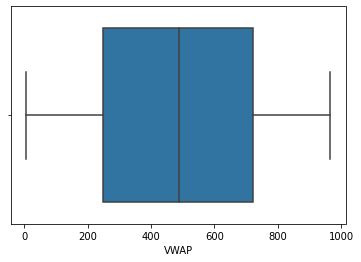

In [9]:
sns.boxplot(x = Train[Train.columns[2]])

In [10]:
Q1 = Train[Train.columns[2:-1]].quantile(0.2)
Q3 = Train[Train.columns[2:-1]].quantile(0.8)

IQR = Q1 - Q3

In [11]:
IQR

VWAP                   -5.731000e+02
General Index          -4.144520e+04
NAV                    -5.338600e+01
P/E Ratio              -1.128660e+02
Volumes Traded         -1.151669e+07
Inventory Turnover     -3.310000e+00
Covid Impact (Beta)    -2.000000e-01
Tracking Error         -2.776000e-02
Dollar Exchange Rate   -7.390000e+01
Put-Call Ratio         -4.100000e-01
P/B Ratio              -5.390000e+00
dtype: float64

In [12]:
(Train[Train.columns[2:-1]] > (Q1 - 1.5*IQR)) | (Train[Train.columns[2:-1]] < (Q3 + 1.5*IQR))

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7378,False,False,False,False,False,False,True,False,False,False,False
7379,False,False,False,False,False,False,False,False,False,False,False
7380,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False


In [13]:
Train_out = Train[~((Train[Train.columns[2:-1]] > (Q1 - 1.5*IQR)) | (Train[Train.columns[2:-1]] < (Q3 + 1.5*IQR))).any(axis=1)]

In [14]:
Train_out.shape

(4641, 14)

In [15]:
Train_out

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
1,3.0,3.0,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,0.942804,6.910000,560.859622
2,3.0,3.0,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,0.946485,6.090000,1279.732874
3,0.0,0.0,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.600000,1121.787632
5,0.0,0.0,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.150000,5.510000,158.687016
8,2.0,2.0,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.220000,6.460000,514.240811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,4.0,4.0,859.76,3351.28,34.16,192.53,5295644.0,7.19,0.11,0.0337,1.0,0.820000,4.930855,649.376301
7379,1.0,1.0,61.97,55722.00,79.56,62.90,8108942.0,3.48,0.23,0.0528,17.7,0.840000,5.043177,494.555631
7380,1.0,1.0,131.99,55722.00,26.16,198.77,8382586.0,3.04,0.03,0.0359,17.7,1.220000,5.062095,500.869063
7381,4.0,4.0,643.72,3351.28,29.24,38.83,18638400.0,2.66,0.03,0.0581,1.0,1.040000,4.981380,113.170686


In [16]:
correlationMatrix = Train_out.corr()



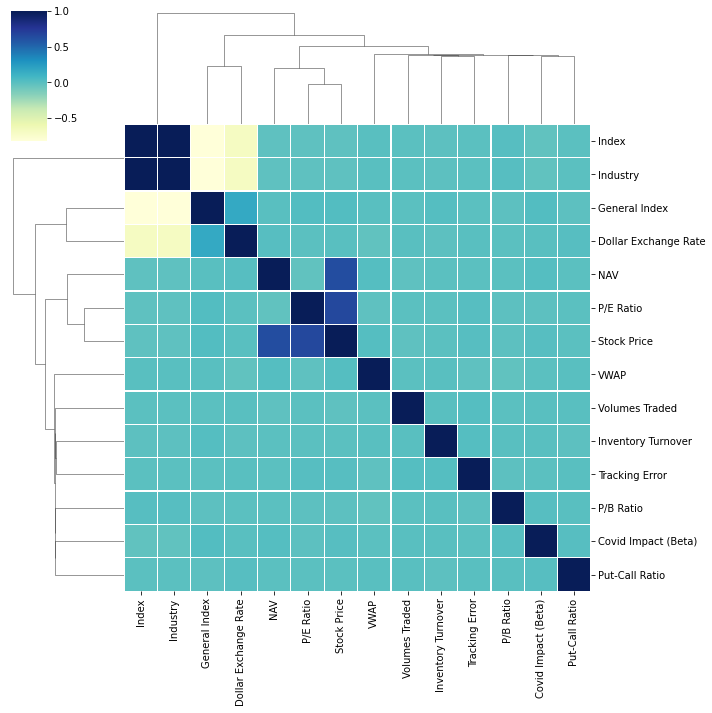

In [17]:
cg = sns.clustermap(correlationMatrix, cmap ="YlGnBu", linewidths = 0.3); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [18]:
Train_out.columns

Index(['Index', 'Industry', 'VWAP', 'General Index', 'NAV', 'P/E Ratio',
       'Volumes Traded', 'Inventory Turnover', 'Covid Impact (Beta)',
       'Tracking Error', 'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio',
       'Stock Price'],
      dtype='object')

In [19]:
X = np.array(Train_out[Train_out.columns[0:-1]])
y = np.array(Train_out[Train_out.columns[-1]])

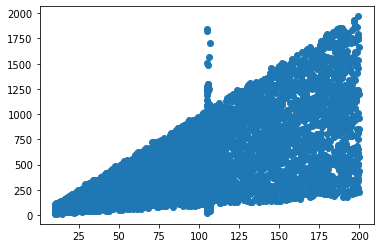

In [20]:
plt.scatter(X[:, 5], y)
plt.show()

In [21]:
X

array([[3.00000000e+00, 3.00000000e+00, 2.14520000e+02, ...,
        1.00000000e+00, 9.42804276e-01, 6.91000000e+00],
       [3.00000000e+00, 3.00000000e+00, 9.43420000e+02, ...,
        1.00000000e+00, 9.46485067e-01, 6.09000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.28130000e+02, ...,
        7.49000000e+01, 1.11000000e+00, 5.60000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.31990000e+02, ...,
        1.77000000e+01, 1.22000000e+00, 5.06209479e+00],
       [4.00000000e+00, 4.00000000e+00, 6.43720000e+02, ...,
        1.00000000e+00, 1.04000000e+00, 4.98138016e+00],
       [4.00000000e+00, 4.00000000e+00, 1.26460000e+02, ...,
        1.00000000e+00, 1.23000000e+00, 5.07378784e+00]])

In [22]:
X

array([[3.00000000e+00, 3.00000000e+00, 2.14520000e+02, ...,
        1.00000000e+00, 9.42804276e-01, 6.91000000e+00],
       [3.00000000e+00, 3.00000000e+00, 9.43420000e+02, ...,
        1.00000000e+00, 9.46485067e-01, 6.09000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.28130000e+02, ...,
        7.49000000e+01, 1.11000000e+00, 5.60000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.31990000e+02, ...,
        1.77000000e+01, 1.22000000e+00, 5.06209479e+00],
       [4.00000000e+00, 4.00000000e+00, 6.43720000e+02, ...,
        1.00000000e+00, 1.04000000e+00, 4.98138016e+00],
       [4.00000000e+00, 4.00000000e+00, 1.26460000e+02, ...,
        1.00000000e+00, 1.23000000e+00, 5.07378784e+00]])

In [23]:
#X_normalized = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
regressor.coef_

array([ 3.03960256e+00,  3.03960256e+00,  2.61117357e-02,  4.15299191e-04,
        1.04881579e+01,  5.27372037e+00, -1.11938371e-07,  3.61895186e-01,
        3.15525276e+01,  2.10912613e+00,  4.09583982e-02, -1.73404038e+01,
       -8.15557070e-02])

In [26]:
data_test = pd.read_csv('Test_dataset.csv',sep=',')

label_encoder = preprocessing.LabelEncoder() 
print(data_test.columns)
data_test[data_test.columns[0]] = label_encoder.fit_transform(data_test[data_test.columns[0]])
data_test[data_test.columns[1]] = label_encoder.fit_transform(data_test[data_test.columns[1]])
data_test[data_test.columns[2]] = label_encoder.fit_transform(data_test[data_test.columns[1]])

X_test = np.array(data_test[data_test.columns[1:]])


Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio'],
      dtype='object')


In [27]:
X_train.shape

(3712, 13)

In [28]:
X.shape

(4641, 13)

In [29]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_test)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [30]:
X_test = imp.transform(X_test)

In [31]:
result = pd.DataFrame(regressor.predict(X_test))

result.to_csv('Output-1.csv')

In [32]:
regressor.predict(X_test[1].reshape(1,-1))

array([410.92347211])

In [86]:
clf.get_params

<bound method BaseEstimator.get_params of SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>